In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.transform import resize
from matplotlib import pyplot as plt

In [5]:
import cv2
import imghdr

C:\Users\risha\AppData\Local\Temp\ipykernel_4568\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = "F:\image classification\gesture recongnition\data"  # Replace with the path to your data folder

print(data_dir)

F:\image classification\gesture recongnition\data


-10546.0


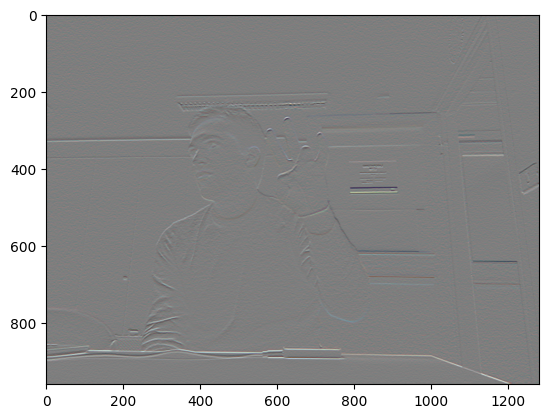

In [116]:
img = cv2.imread("F:\image classification\gesture recongnition/data/G10/0_1_10_rgb.png")
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
grad  = sobely 
#abs_sobel64f = np.absolute(grad)
#sobel_8u = np.uint8(abs_sobel64f)

#plt.imshow(sobel_8u)
min_grad = grad.min()
print(min_grad)
grad_mod = ( grad - min_grad )
max_grad = grad_mod.max()
grad = grad_mod/max_grad
grad.max()
grad.min()
plt.imshow(grad)


255


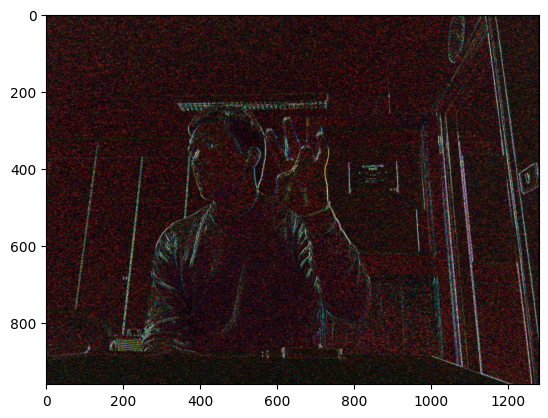

In [106]:
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
print(sobel_8u.max())
plt.imshow(sobel_8u)

In [5]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 1400 files belonging to 10 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [7]:
batch = data_iterator.next()

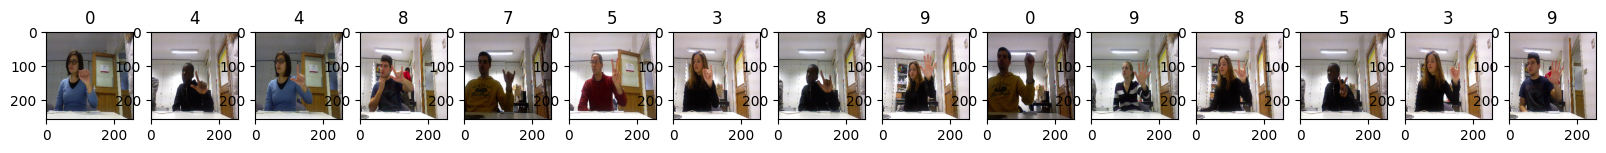

In [8]:
fig, ax = plt.subplots(ncols=15, figsize=(20,20))
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
batch[0].max()

254.0

In [10]:
data = data.map(lambda x,y: (x/255,y))
data.as_numpy_iterator().next()[0].max()

0.99607843

In [11]:
#split data
train_size = int(len(data)*.5)
val_size = int(len(data)*.3)
test_size = int(len(data)*.2)

print(test_size)

8


In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        9280      
                                                                 
 flatten_1 (Flatten)         (None, 230400)           

In [21]:
logdir = "F:\image classification\gesture recongnition\logs"

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [25]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
22/22 [==============================] - 68s 3s/step - loss: 0.8382 - accuracy: 0.9176 - val_loss: 1.2632 - val_accuracy: 0.8389
Epoch 2/30
22/22 [==============================] - 69s 3s/step - loss: 0.8531 - accuracy: 0.9304 - val_loss: 1.1547 - val_accuracy: 0.8341
Epoch 3/30
22/22 [==============================] - 68s 3s/step - loss: 0.8258 - accuracy: 0.9332 - val_loss: 1.0568 - val_accuracy: 0.8654
Epoch 4/30
22/22 [==============================] - 69s 3s/step - loss: 0.7330 - accuracy: 0.9460 - val_loss: 1.2181 - val_accuracy: 0.8438
Epoch 5/30
22/22 [==============================] - 68s 3s/step - loss: 0.7282 - accuracy: 0.9489 - val_loss: 1.0703 - val_accuracy: 0.8726
Epoch 6/30
22/22 [==============================] - 69s 3s/step - loss: 0.7225 - accuracy: 0.9489 - val_loss: 1.0511 - val_accuracy: 0.8918
Epoch 7/30
22/22 [==============================] - 1757s 83s/step - loss: 0.6532 - accuracy: 0.9631 - val_loss: 1.0208 - val_accuracy: 0.8630
Epoch 8/30
22/22 

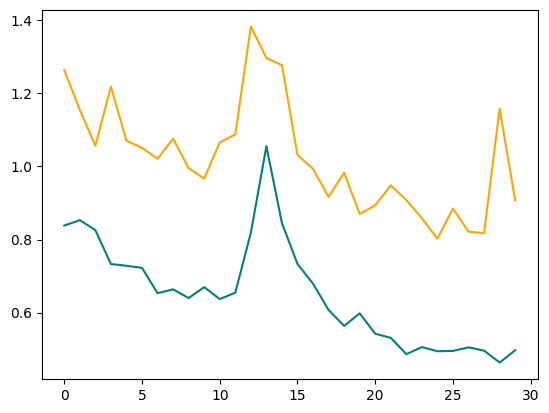

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label= 'loss')
plt.plot(hist.history['val_loss'], color='orange', label= 'va_loss')
plt.show()

In [27]:
len(batch)

2

In [28]:
count=0
y_pred=[]
y_gt=[]
for batch in test.as_numpy_iterator():
    X, y = batch
    y_gt.append(y)
    yhat = model.predict(X)
    y_pred.append(model.predict(X))
    count +=1

1/1 [==============================] - 0s 462ms/step


In [29]:
print(y_gt)
print(c)

[array([4, 7, 7, 4, 7, 2, 0, 2, 4, 5, 1, 9, 2, 4, 4, 9, 4, 2, 9, 6, 7, 8,
       9, 2, 7, 2, 5, 9, 7, 2, 2, 1]), array([3, 1, 7, 4, 4, 8, 6, 5, 8, 7, 1, 5, 0, 5, 9, 4, 3, 7, 5, 4, 8, 7,
       6, 0, 7, 6, 2, 8, 4, 4, 5, 2]), array([3, 6, 4, 1, 0, 5, 9, 7, 4, 5, 2, 6, 2, 7, 8, 8, 7, 4, 8, 9, 8, 3,
       0, 9, 1, 3, 9, 9, 3, 2, 3, 1]), array([7, 4, 5, 1, 1, 3, 5, 9, 1, 9, 2, 6, 5, 5, 9, 2, 7, 2, 9, 0, 4, 9,
       0, 2, 5, 3, 3, 6, 6, 0, 8, 2]), array([7, 9, 9, 0, 3, 8, 7, 0, 3, 7, 8, 3, 8, 4, 5, 3, 7, 5, 1, 1, 0, 9,
       5, 4, 0, 3, 8, 2, 5, 5, 9, 4]), array([1, 5, 0, 7, 5, 4, 8, 4, 7, 3, 7, 6, 3, 6, 2, 2, 0, 1, 9, 9, 1, 8,
       4, 5, 8, 2, 4, 2, 9, 0, 8, 4]), array([4, 8, 3, 1, 1, 5, 0, 6, 2, 0, 8, 2, 7, 7, 5, 7, 5, 7, 8, 8, 7, 6,
       2, 7, 9, 9, 2, 8, 8, 4, 0, 0]), array([0, 5, 6, 3, 8, 9, 8, 9, 6, 4, 0, 0, 8, 8, 5, 8, 5, 8, 2, 2, 0, 1,
       7, 3, 8, 6, 6, 2, 8, 7, 2, 0])]


NameError: name 'c' is not defined

In [30]:
#len(y_pred[1])
c = np.zeros((8,32))
for i in range(32):
    for j in range(8):
        c[j][i]  = int(np.argmax(y_pred[j][i]))
        a = int(y_gt[0][0])


In [33]:
count = 0
for i in range(8):
    for j in range(32):
        if(int(y_gt[i][j]) == c[i][j]):
            count += 1

Acc = count/(32*8)
print(Acc)     

0.81640625


In [2]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('F:\image classification\gesture recongnition\model', 'Hand_gesture_recognition.h5'))

In [7]:
new_model = load_model(os.path.join('F:\image classification\gesture recongnition\model', 'Hand_gesture_recognition.h5'))

In [8]:
def __draw_label(img, text, pos, bg_color):
   font_face = cv2.FONT_HERSHEY_SIMPLEX
   scale = 1
   color = (0, 0, 0)
   thickness = cv2.FILLED
   margin = 2
   txt_size = cv2.getTextSize(text, font_face, scale, thickness)

   end_x = pos[0] + txt_size[0][0] + margin
   end_y = pos[1] - txt_size[0][1] - margin

   cv2.rectangle(img, pos, (end_x, end_y), bg_color, thickness)
   cv2.putText(img, text, pos, font_face, scale, color, 1, cv2.LINE_AA)

In [9]:
def __pred_value(prediction):  
    a  = np.argmax(prediction)
        
    return a

In [10]:


# Open the device at the ID 0
# Use the camera ID based on
# /dev/videoID needed
cap = cv2.VideoCapture(0)

#Check if camera was opened correctly
if not (cap.isOpened()):
    print("Could not open video device")

# 2) fetch one frame at a time from your camera
while(True):
    
    # frame is a numpy array, that you can predict on 
    ret, frame = cap.read()
    
    ext_test = tf.image.resize(frame, (256,256))
    
    # 3) obtain the prediction
    # depending on your model, you may have to reshape frame
    prediction = new_model(np.expand_dims(ext_test/255, 0), training=False)
   
    # you may need then to process prediction to obtain a label of your data, depending on your model. Probably you'll have to apply an argmax to prediction to obtain a label.
    
    label = __pred_value(prediction)
   # print(label)
    
    # 4) Adding the label on your frame
    __draw_label(frame, 'Label: {}'.format(label), (20,20), (255,0,0))

    # 5) Display the resulting frame
    cv2.imshow("preview",frame)
   
    #Waits for a user input to quit the application
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 